In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO
from sklearn.tree import DecisionTreeRegressor

In [2]:
data=pd.read_csv("D:\Self\Data Science\Decision Tree\Assignment\Fraud_check.csv")

In [3]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
data=pd.get_dummies(data,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [5]:
data["TaxInc"]=pd.cut(data["Taxable.Income"],bins=[1002,3000,99620],labels=["risky","Good"])
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


### Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [6]:
# After creation of new col. TaxInc also made its dummies var concating right side of data
data=pd.get_dummies(data,columns =["TaxInc"],drop_first=True)
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


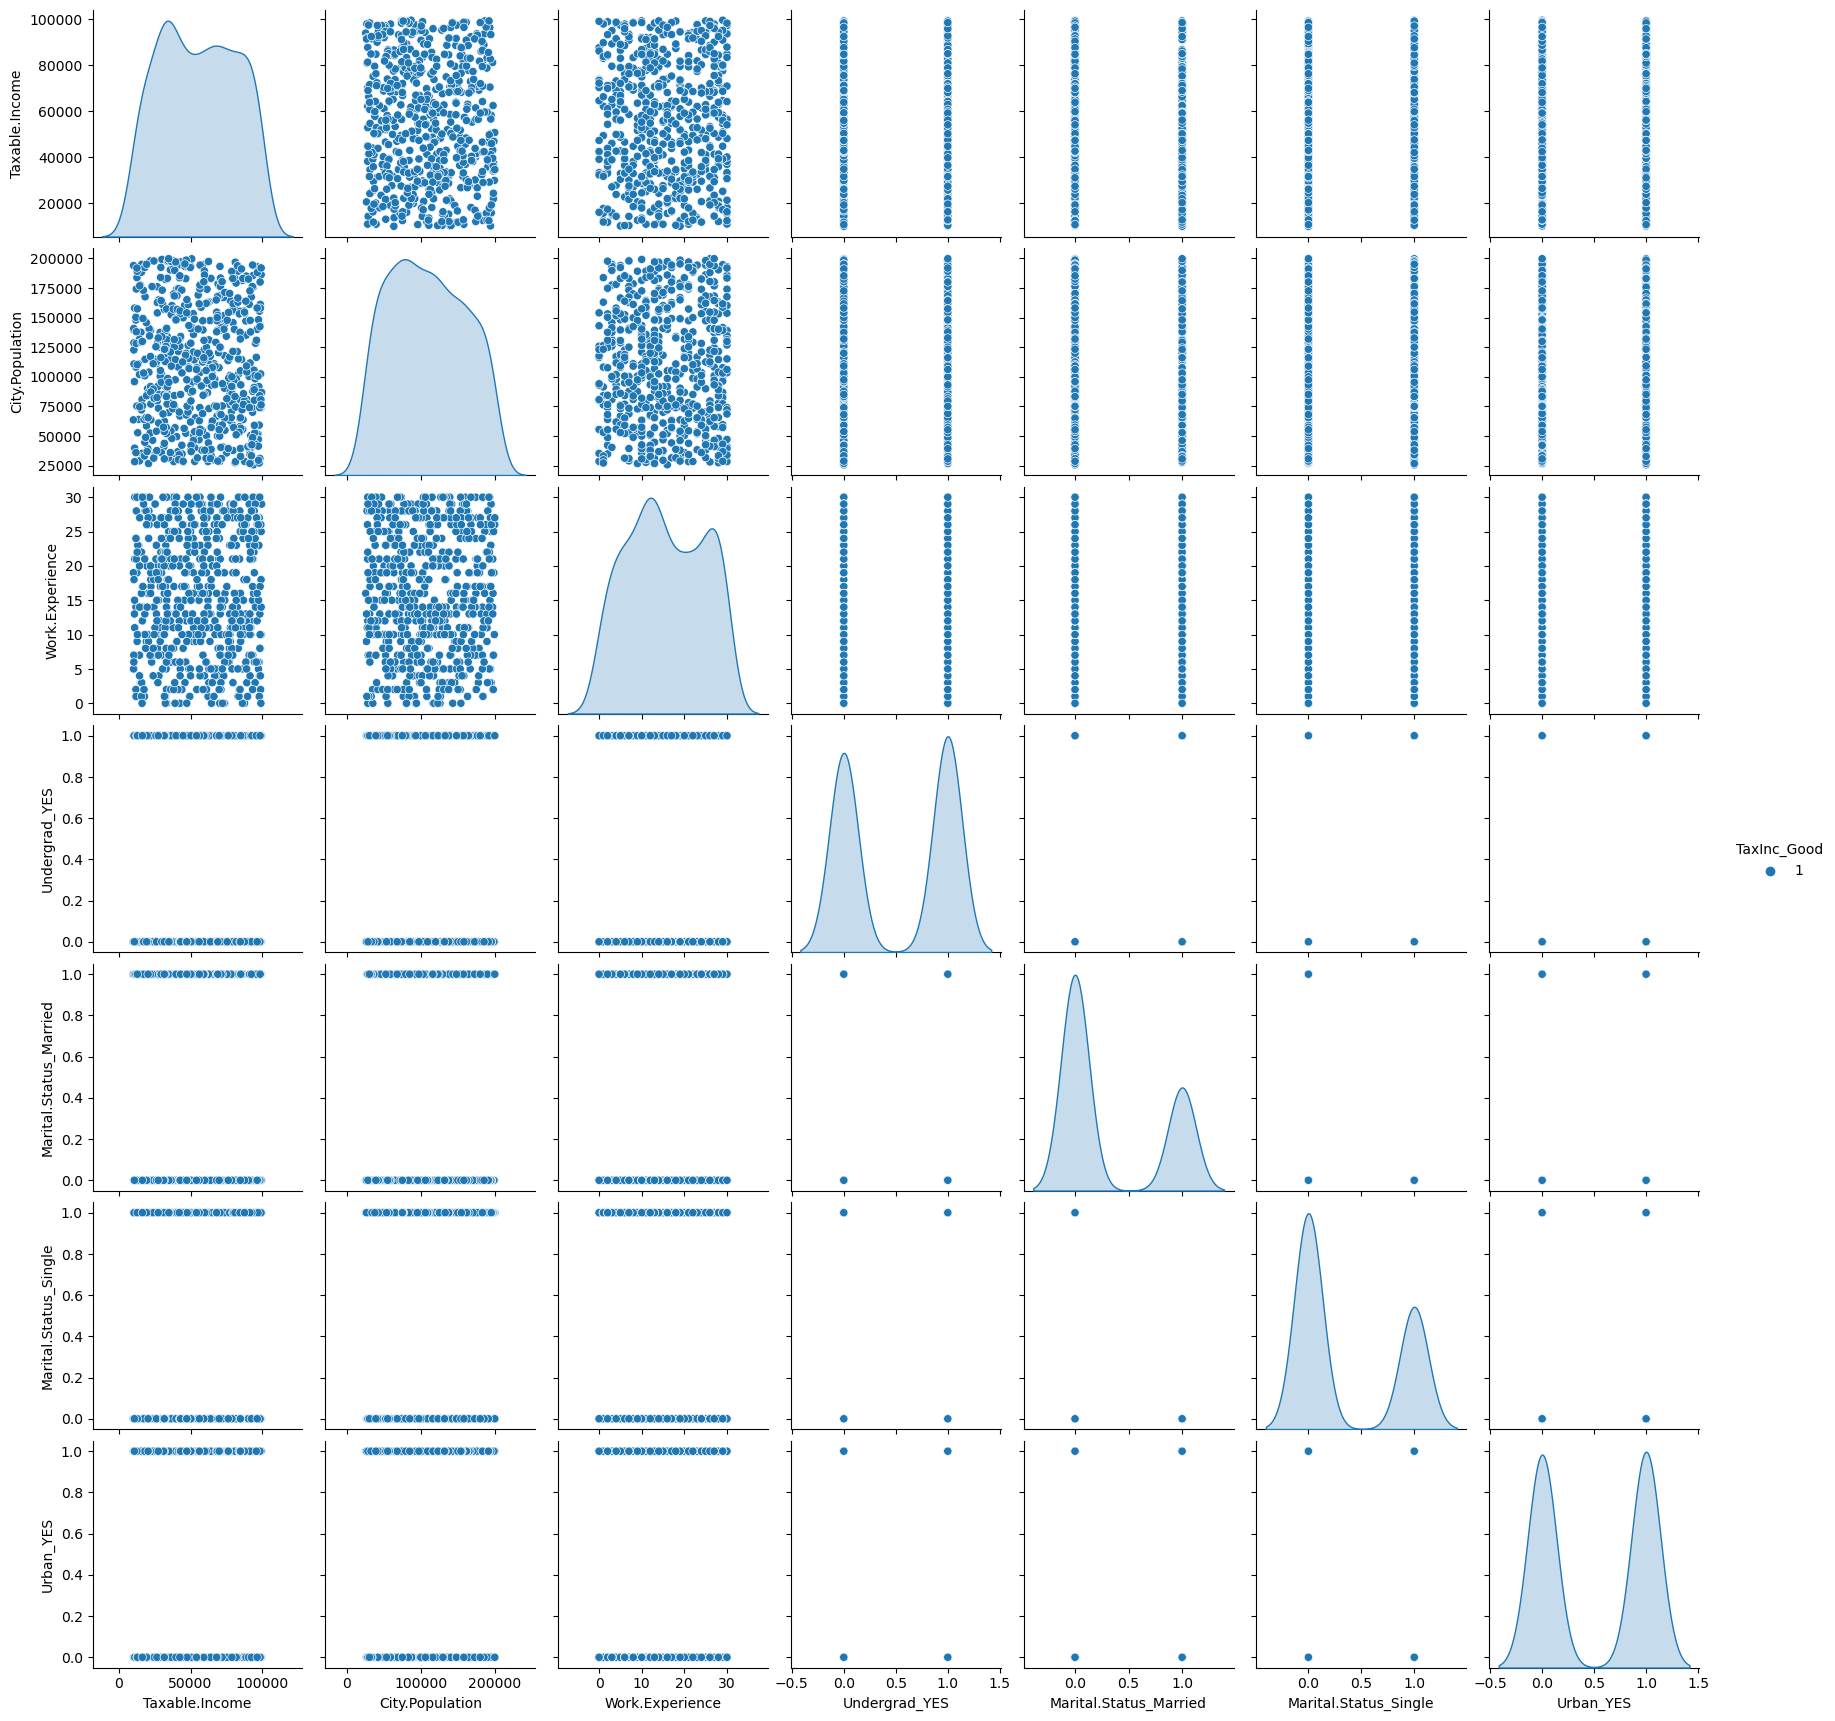

In [7]:
sns.pairplot(data=data,hue='TaxInc_Good')

In [8]:
# Normalization function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [9]:
#  Normalized data Frame (considering the numerical part of data)
df_norm=norm_func(data.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,NaN
591,0.615406,0.600000,1.0,0.0,1.0,1.0,NaN
592,0.283703,0.533333,1.0,0.0,1.0,0.0,NaN
593,0.610256,0.333333,0.0,0.0,0.0,1.0,NaN
594,0.412341,0.300000,0.0,1.0,0.0,1.0,NaN
595,0.078811,0.233333,1.0,0.0,0.0,1.0,NaN
596,0.170058,0.066667,1.0,0.0,0.0,1.0,NaN
597,0.737240,0.000000,0.0,0.0,0.0,1.0,NaN
598,0.886810,0.566667,1.0,1.0,0.0,0.0,NaN
599,0.760683,0.533333,0.0,0.0,0.0,0.0,NaN


In [10]:
# Declaring features & target
x = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [11]:
# Splitting Data into Train & Test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
#Converting the Taxable Income variable to bucketing
df_norm["income"]="<=30000"
df_norm.loc[data["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[data["Taxable.Income"]>=30000,"income"]="Risky"


In [13]:
#Dropping the taxable income variable
data.drop(["Taxable.Income"],axis=1,inplace=True)

In [14]:
data.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience"})
# As we are getting error as "ValueError:could not convertstring to float:'yes'"
#model.fit does not consider string. so we are encode

,population,experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,1
2,160205,30,0,1,0,1,1
3,193264,15,1,0,1,1,1
4,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...
595,39492,7,1,0,0,1,1
596,55369,2,1,0,0,1,1
597,154058,0,0,0,0,1,1
598,180083,17,1,1,0,0,1


In [15]:
le=preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype==object:
        data[column_name]=le.fit_transform(df[column_name])
    else:
        pass

In [16]:
# Splitting data into features and labels
features=data.iloc[:,0:5]
labels=data.iloc[:,5]

In [17]:
# Collecting the column names
colnames = list(data.columns)
predictors = colnames[0:5]
target = colnames[5]


In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [19]:
model=RF(n_jobs = 3,n_estimators=15,oob_score=True,criterion='entropy')
model.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [20]:
model.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1879051790),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1225221025),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1375245863),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=2124193822),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=416726602),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1667524923),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=298649234),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1307587235),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
        

In [21]:
model.classes_

array([0, 1], dtype=uint8)

In [22]:
model.n_features_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


5

In [23]:
model.n_classes_

2

In [24]:
model.n_outputs_

1

In [25]:
model.oob_score_

0.525

In [26]:
prediction=model.predict(X_train)

In [27]:
accuracy=accuracy_score(Y_train,prediction)

In [28]:
np.mean(prediction== Y_train)

0.9895833333333334

In [29]:
confusion=confusion_matrix(Y_train,prediction)

In [30]:
pred_test=model.predict(X_test)

In [31]:
acc_test=accuracy_score(Y_test,pred_test)

In [32]:
tree = model.estimators_[5]

In [33]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target)

In [34]:
!pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable


In [35]:
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [36]:
graph

### Building Decision Tree Classifier using Entropy Criteria

In [37]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [40]:
tree.plot_tree(model)

[Text(0.4230769230769231, 0.875, 'X[1] <= 0.5\nentropy = 1.0\nsamples = 480\nvalue = [238, 242]'),
 Text(0.15384615384615385, 0.625, 'X[0] <= 80350.5\nentropy = 0.65\nsamples = 12\nvalue = [2, 10]'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.23076923076923078, 0.375, 'X[0] <= 117085.0\nentropy = 0.811\nsamples = 8\nvalue = [2, 6]'),
 Text(0.15384615384615385, 0.125, 'entropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6923076923076923, 0.625, 'X[0] <= 194579.5\nentropy = 1.0\nsamples = 468\nvalue = [236, 232]'),
 Text(0.5384615384615384, 0.375, 'X[0] <= 188225.0\nentropy = 1.0\nsamples = 452\nvalue = [224, 228]'),
 Text(0.46153846153846156, 0.125, 'entropy = 1.0\nsamples = 433\nvalue = [220, 213]'),
 Text(0.6153846153846154, 0.125, 'entropy = 0.742\nsamples = 19\nvalue = [4, 15]'),
 Text(0.8461538461538461, 0.375, 'X[2] <= 0.5\nentropy = 0.811\nsamples = 16\n

In [41]:
colnames=list(data.columns)
colnames

['City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

In [42]:
fn=['City.Polpulation','Work.Experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES','TaxInc_Good']
cn=['1','0']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,
              feature_names=fn,
              class_names=cn,
              filled=True)

[Text(0.4230769230769231, 0.875, 'Work.Experience <= 0.5\nentropy = 1.0\nsamples = 480\nvalue = [238, 242]\nclass = 0'),
 Text(0.15384615384615385, 0.625, 'City.Polpulation <= 80350.5\nentropy = 0.65\nsamples = 12\nvalue = [2, 10]\nclass = 0'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = 0'),
 Text(0.23076923076923078, 0.375, 'City.Polpulation <= 117085.0\nentropy = 0.811\nsamples = 8\nvalue = [2, 6]\nclass = 0'),
 Text(0.15384615384615385, 0.125, 'entropy = 1.0\nsamples = 4\nvalue = [2, 2]\nclass = 1'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = 0'),
 Text(0.6923076923076923, 0.625, 'City.Polpulation <= 194579.5\nentropy = 1.0\nsamples = 468\nvalue = [236, 232]\nclass = 1'),
 Text(0.5384615384615384, 0.375, 'City.Polpulation <= 188225.0\nentropy = 1.0\nsamples = 452\nvalue = [224, 228]\nclass = 0'),
 Text(0.46153846153846156, 0.125, 'entropy = 1.0\nsamples = 433\nvalue = [220, 213]\nclass = 1'),
 Tex

In [44]:
#predicting on test data
preds=model.predict(X_test)
pd.Series(preds).value_counts()

0    114
1      6
dtype: int64

In [45]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [46]:
pd.crosstab(Y_test,preds)

col_0,0,1
Urban_YES,,
0,56,4
1,58,2


In [47]:
#accuracy
np.mean(preds==y_test)

0.0

### Building Decision Tree Classifier(CART) using gini criteria

In [48]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=0.3)

In [49]:
model_gini

DecisionTreeClassifier(max_depth=0.3)

In [50]:
model_gini.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=0.3)

In [51]:
pred=model.predict(X_test)
np.mean(preds==Y_test)

0.48333333333333334

### Decision Tree Regression Example

In [56]:
array = data.values
X = array[:,0:3]
y = array[:,3]

In [58]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.33,random_state=1)

In [59]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [63]:
model.score(x_test ,y_test)

1.0